In [1]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
insurance_data = pd.read_csv("insurance.csv") 

x = insurance_data.drop(columns=["charges"])
y = insurance_data["charges"]

x = pd.get_dummies(x, columns=["region"], drop_first=False, dtype=int)

x["sex"] = x["sex"].map({"female":1,"male":0})
x["smoker"]=x["smoker"].map({"yes":1,"no":0})

x["age_smoker"] = x["age"] * x["smoker"]
x["bmi_smoker"] = x["bmi"] * x["smoker"]

x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42)

MSE for alpha=0.001: 20919120.690722693
MSE for alpha=0.1: 20919120.690722693
MSE for alpha=1: 20919120.690722693
MSE for alpha=2: 20919120.690722693
MSE for alpha=5: 20919120.690722693
MSE for alpha=10: 20919120.690722693
MSE for alpha=20: 20919120.690722693
MSE for alpha=30: 20919120.690722693
MSE for alpha=40: 20919120.690722693
MSE for alpha=50: 20919120.690722693
MSE for alpha=100: 20919120.690722693


<Axes: >

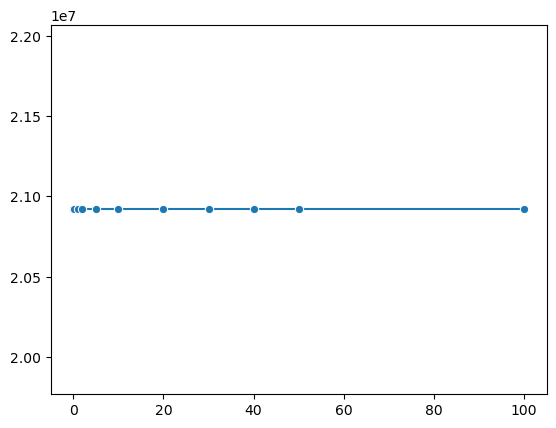

In [3]:
import seaborn as sns
alphas = [0.001, 0.1, 1, 2, 5, 10, 20, 30, 40, 50,100]
mses = []
for a in alphas:
    lasso_model = Lasso(alpha=0.5)
    lasso_model.fit(x_train,y_train)

    y_pred = lasso_model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    print(f"MSE for alpha={a}:",mse)
    mses.append(mse)

sns.lineplot(x=alphas,y=mses,marker="o")

In [4]:
from sklearn.linear_model import LassoCV
alphas = [0.001, 0.1, 1, 2, 5, 10, 20, 30, 40, 50,100]

lasso_cv_model = LassoCV(
    alphas=alphas,
    cv=5,
    max_iter=1000,
    random_state=42
)

lasso_cv_model.fit(x_train,y_train)
                  
print("best alpha:",lasso_cv_model.alpha_)

y_pred = lasso_cv_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("mse =", mse)
print("s2 =",r2)

best alpha: 0.001
mse = 20922596.5280062
s2 = 0.8652317714485489
